In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
ecommerce = pd.read_csv("data.csv", encoding = "ISO-8859-1")

In [3]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
ecommerce["CustomerID"] = ecommerce["CustomerID"].astype(str)
ecommerce["TotalPrice"] = ecommerce["Quantity"]*ecommerce["UnitPrice"]
ecommerce["InvoiceDate"] = pd.to_datetime(ecommerce["InvoiceDate"])

In [6]:
len(np.where(ecommerce.duplicated())[0])
ecommerce = ecommerce.drop_duplicates()
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      536641 non-null object
StockCode      536641 non-null object
Description    535187 non-null object
Quantity       536641 non-null int64
InvoiceDate    536641 non-null datetime64[ns]
UnitPrice      536641 non-null float64
CustomerID     536641 non-null object
Country        536641 non-null object
TotalPrice     536641 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.9+ MB


In [7]:
for i in ecommerce.columns:
    print(i, "\t", max(ecommerce[i].isnull()))

InvoiceNo 	 False
StockCode 	 False
Description 	 True
Quantity 	 False
InvoiceDate 	 False
UnitPrice 	 False
CustomerID 	 False
Country 	 False
TotalPrice 	 False


In [45]:
ecommerce[(ecommerce['CustomerID']=='nan')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,nan,United Kingdom,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,nan,United Kingdom,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,nan,United Kingdom,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,nan,United Kingdom,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,nan,United Kingdom,3.32
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,nan,United Kingdom,14.94
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,nan,United Kingdom,5.02
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,nan,United Kingdom,4.30
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,nan,United Kingdom,3.87
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,nan,United Kingdom,4.73


In [8]:
ecommerce = ecommerce[~(ecommerce['CustomerID']=='nan')]
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null datetime64[ns]
UnitPrice      401604 non-null float64
CustomerID     401604 non-null object
Country        401604 non-null object
TotalPrice     401604 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.6+ MB


In [9]:
id_length = ecommerce["CustomerID"].str.len()[0]
ecommerce['CustomerID'] = ecommerce['CustomerID'].str.slice(0,id_length-2)

In [10]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [11]:
ecommerce['UnitPrice'].describe()

count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [12]:
ecommerce['Quantity'].describe()

count    401604.000000
mean         12.183273
std         250.283037
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [13]:
ecommerce[ecommerce['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,-41.40
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom,-39.60
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom,-25.50


In [14]:
ecommerce = ecommerce[ecommerce['Quantity']>=0]
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      392732 non-null object
StockCode      392732 non-null object
Description    392732 non-null object
Quantity       392732 non-null int64
InvoiceDate    392732 non-null datetime64[ns]
UnitPrice      392732 non-null float64
CustomerID     392732 non-null object
Country        392732 non-null object
TotalPrice     392732 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.0+ MB


In [15]:
ecommerce.to_csv("data_clean.csv")

In [96]:
temp = ecommerce.groupby(['CustomerID', 'InvoiceNo'])['StockCode'].nunique() 
UniqueItemsPerInvoice = temp.groupby(['CustomerID']).mean()

temp = ecommerce.groupby(['CustomerID', 'InvoiceNo'])['Quantity'].sum()
QuantityPerInvoice = temp.groupby(['CustomerID']).mean()

temp = ecommerce.groupby(['CustomerID', 'InvoiceNo'])['TotalPrice'].sum()
SpendingPerInvoice = temp.groupby(['CustomerID']).mean()

customer = pd.DataFrame({'UnitPriceMean':ecommerce.groupby(['CustomerID'])['UnitPrice'].mean(),
    'UnitPriceStd':ecommerce.groupby(['CustomerID'])['UnitPrice'].std(), 
    'TotalQuantity':ecommerce.groupby(['CustomerID'])['Quantity'].size(),
    'NoOfUniqueItems':ecommerce.groupby(['CustomerID'])['StockCode'].nunique(),
    'NoOfInvoices':ecommerce.groupby(['CustomerID'])['InvoiceNo'].nunique(),
    'UniqueItemsPerInvoice':UniqueItemsPerInvoice,
    'QuantityPerInvoice':QuantityPerInvoice,
    'SpendingPerInvoice':SpendingPerInvoice
})                         

In [101]:
print(customer.shape)
customer.head()

(4339, 8)


,NoOfInvoices,NoOfUniqueItems,QuantityPerInvoice,SpendingPerInvoice,TotalQuantity,UniqueItemsPerInvoice,UnitPriceMean,UnitPriceStd
CustomerID,,,,,,,,
12346,1,1,74215.000000,77183.600000,1,1.00,1.040000,NaN
12347,7,103,351.142857,615.714286,182,26.00,2.644011,2.255381
12348,4,22,585.250000,449.310000,31,6.75,5.764839,13.400323
12349,1,73,631.000000,1757.550000,73,73.00,8.289041,35.028021
12350,1,17,197.000000,334.400000,17,17.00,3.841176,9.334751


In [103]:
customer[customer['UnitPriceStd'].isnull()].shape

(72, 8)

In [104]:
customer = customer[~customer['UnitPriceStd'].isnull()]
customer.shape

(4267, 8)

In [129]:
customer.head()

,NoOfInvoices,NoOfUniqueItems,QuantityPerInvoice,SpendingPerInvoice,TotalQuantity,UniqueItemsPerInvoice,UnitPriceMean,UnitPriceStd
CustomerID,,,,,,,,
12347,7,103,351.142857,615.714286,182,26.000,2.644011,2.255381
12348,4,22,585.250000,449.310000,31,6.750,5.764839,13.400323
12349,1,73,631.000000,1757.550000,73,73.000,8.289041,35.028021
12350,1,17,197.000000,334.400000,17,17.000,3.841176,9.334751
12352,8,59,67.000000,313.255000,85,10.375,15.930706,53.706324


In [131]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
customer_norm = scale.fit_transform(customer)

In [132]:
customer_norm = pd.DataFrame(customer_norm, columns=customer.columns, index=customer.index)
customer_norm.head()

,NoOfInvoices,NoOfUniqueItems,QuantityPerInvoice,SpendingPerInvoice,TotalQuantity,UniqueItemsPerInvoice,UnitPriceMean,UnitPriceStd
CustomerID,,,,,,,,
12347,0.344549,0.472431,0.169022,0.155631,0.396235,0.217565,-0.097305,-0.113377
12348,-0.042174,-0.472664,0.512752,0.034670,-0.268725,-0.793114,0.188301,0.475389
12349,-0.428896,0.122396,0.579925,0.985649,-0.083770,2.685196,0.419306,1.617939
12350,-0.428896,-0.531003,-0.057300,-0.048860,-0.330377,-0.254961,0.012255,0.260613
12352,0.473456,-0.040954,-0.248173,-0.064231,-0.030925,-0.602792,1.118642,2.604679


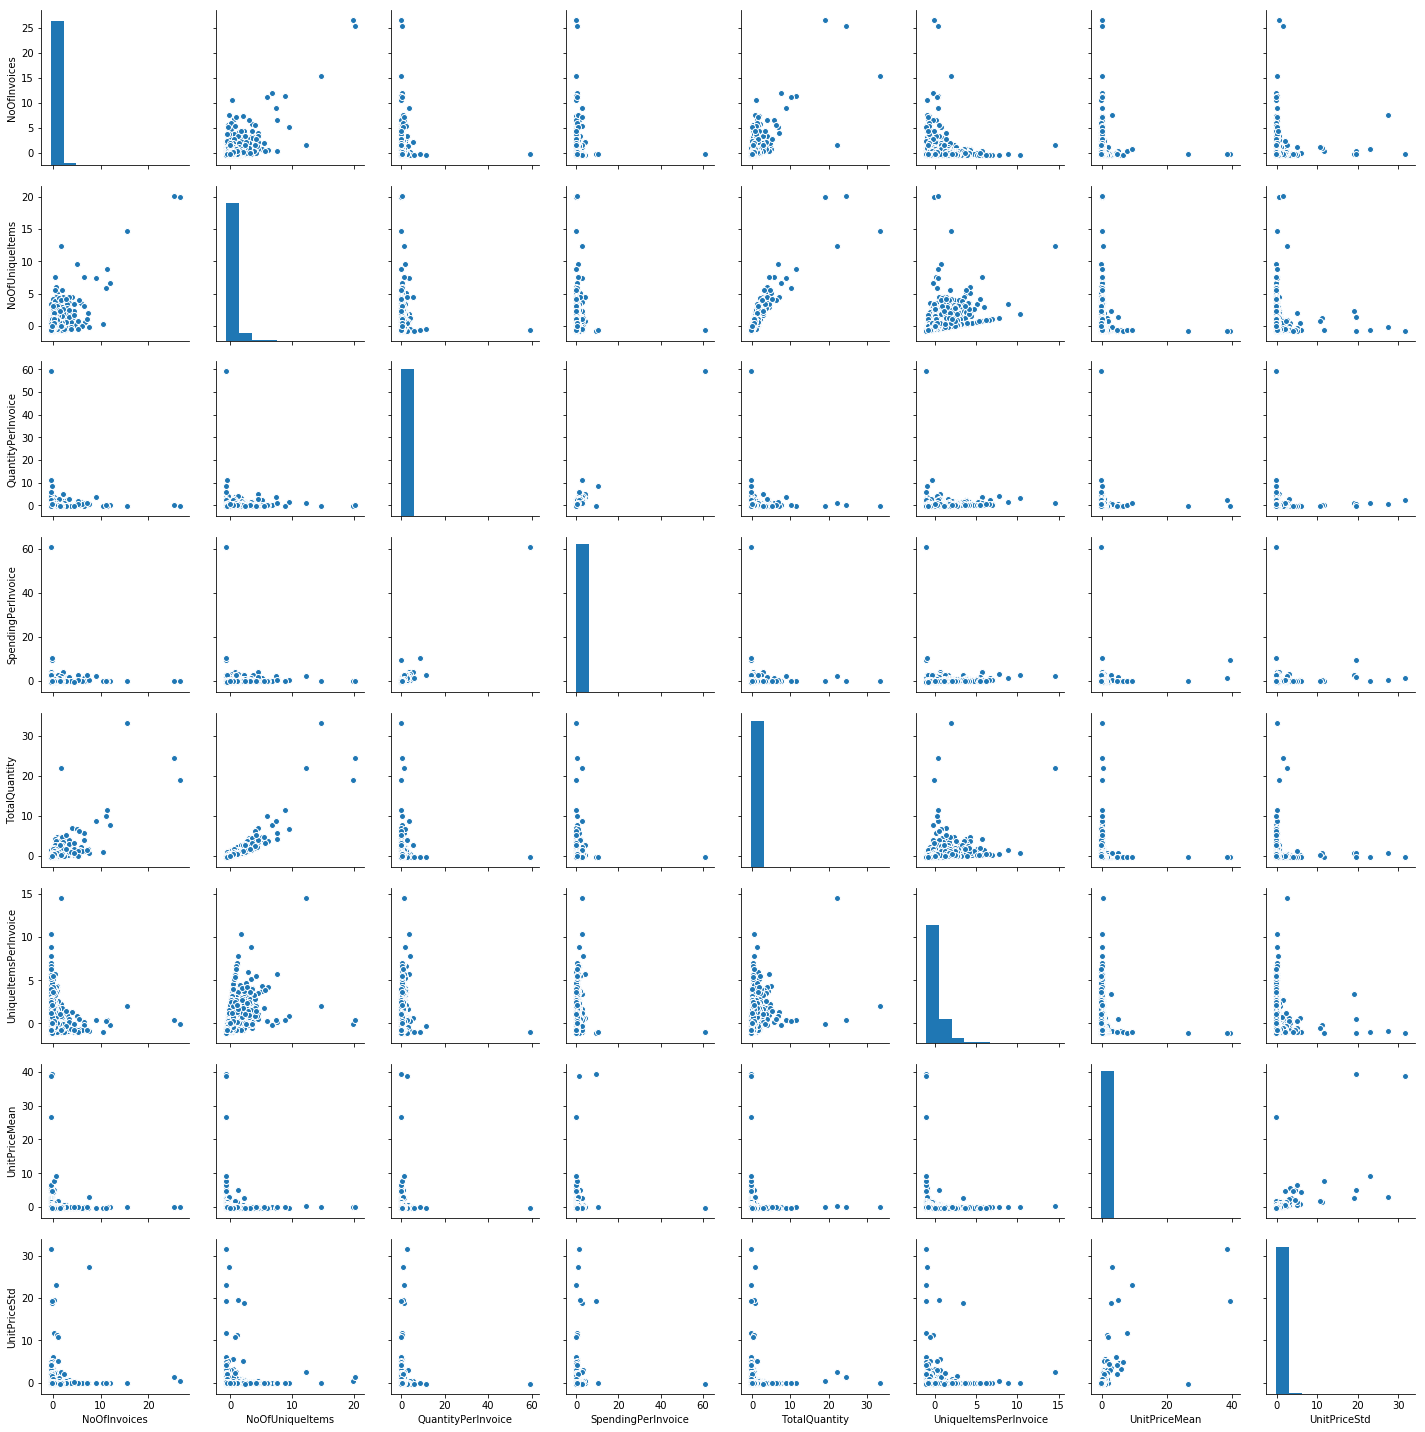

In [133]:
sns.pairplot(customer_norm)

# Start clustering here

In [137]:
from scipy.cluster.hierarchy import dendrogram, linkage
customer_link = linkage(customer_norm, "complete")

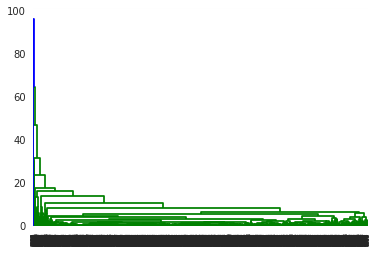

In [138]:
dendrogram(customer_link)
plt.show()

In [144]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [179]:
km = KMeans(n_clusters=4, max_iter=1000)
customer_km = km.fit(customer_norm)

In [181]:
pd.Series(customer_km.labels_).value_counts()

1    4248
0      10
3       8
2       1
dtype: int64

## Outliers removal

In [288]:
for i in range(customer_norm.shape[1]):
    print(customer_norm.iloc[:,i].quantile([0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]))

0.00    -0.428896
0.05    -0.428896
0.10    -0.428896
0.25    -0.428896
0.50    -0.299988
0.75     0.086734
0.90     0.602364
0.95     1.117993
1.00    26.512757
Name: NoOfInvoices, dtype: float64
0.00    -0.717688
0.05    -0.671017
0.10    -0.636013
0.25    -0.531003
0.50    -0.309314
0.75     0.192403
0.90     0.950813
0.95     1.678886
1.00    20.121070
Name: NoOfUniqueItems, dtype: float64
0.00    -0.345078
0.05    -0.292221
0.10    -0.266416
0.25    -0.209264
0.50    -0.108689
0.75     0.051474
0.90     0.264445
0.95     0.529490
1.00    59.115728
Name: QuantityPerInvoice, dtype: float64
0.00    -0.289433
0.05    -0.222531
0.10    -0.203967
0.25    -0.161307
0.50    -0.077887
0.75     0.019567
0.90     0.191215
0.95     0.388499
1.00    60.940662
Name: SpendingPerInvoice, dtype: float64
0.00    -0.396433
0.05    -0.383222
0.10    -0.370011
0.25    -0.325974
0.50    -0.220285
0.75     0.035131
0.90     0.501924
0.95     0.962992
1.00    33.397633
Name: TotalQuantity, dtype: float64

In [289]:
outliers = np.empty((0,1))
for i in range(customer_norm.shape[1]):
    temp = customer_norm.iloc[:,i].quantile([0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])
    outliers = np.append(outliers, np.array(customer_norm[customer_norm.iloc[:,i]>temp[0.95]].index))

In [290]:
outliers = np.unique(outliers)
len(outliers)

952

In [291]:
customer_norm_core = customer_norm[~np.isin(customer_norm.index,outliers)]
customer_norm_outlier = customer_norm[np.isin(customer_norm.index,outliers)]

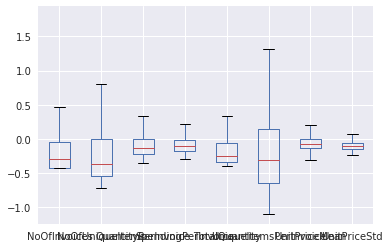

In [292]:
customer_norm_core.boxplot()

## Revisit clustering

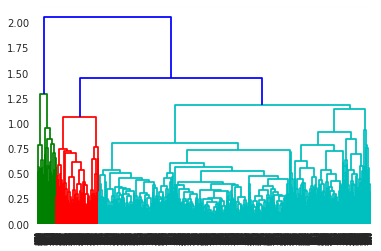

In [300]:
customer_link = linkage(customer_norm_core, "average")
dendrogram(customer_link)
plt.show()

In [311]:
customer_km_sil = np.empty(19)
customer_gmm_sil = np.empty(19)

In [315]:
for i in range(2,21):
    km = KMeans(n_clusters=i)
    gmm = GaussianMixture(n_components=i, max_iter=1000)
    customer_km = km.fit(customer_norm_core)
    customer_km_sil[i-2] = silhouette_score(customer_norm_core, customer_km.labels_)
    customer_gmm = gmm.fit(customer_norm_core)
    customer_gmm_sil[i-2] = silhouette_score(customer_norm_core, customer_gmm.predict(customer_norm_core))

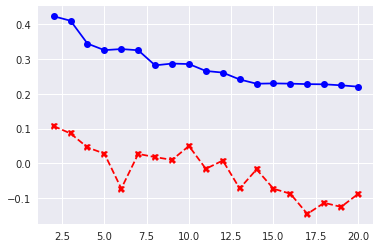

In [314]:
plt.plot(range(2,21), customer_km_sil, 'b-', marker='o', linestyle='-')
plt.plot(range(2,21), customer_gmm_sil, 'r-', marker='X', linestyle='--')

In [316]:
km = KMeans(n_clusters=3, max_iter=1000)
customer_km = km.fit(customer_norm_core)

In [317]:
pd.Series(customer_km.labels_).value_counts()

0    1973
2     765
1     577
dtype: int64

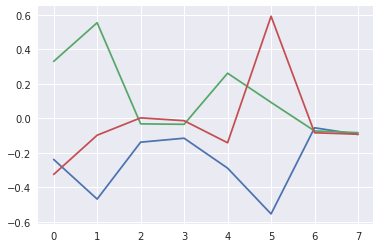

In [318]:
for i in range(km.n_clusters):
    plt.plot(customer_km.cluster_centers_[i,:])

In [319]:
gmm = GaussianMixture(n_components=10)
customer_gmm = gmm.fit(customer_norm_core)

In [321]:
pd.Series(customer_gmm.predict(customer_norm_core)).value_counts()

6    822
1    551
9    366
4    334
8    325
0    276
7    240
2    146
3    145
5    110
dtype: int64

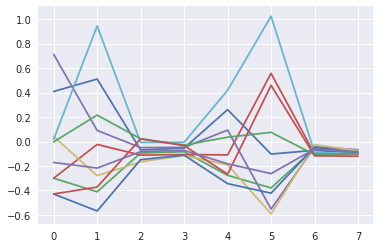

In [323]:
for i in range(gmm.n_components):
    plt.plot(customer_gmm.means_[i,:])

In [325]:
customer_norm_core.columns[[2,3,6,7]]

Index(['QuantityPerInvoice', 'SpendingPerInvoice', 'UnitPriceMean',
       'UnitPriceStd'],
      dtype='object')

In [326]:
customer_norm_core1 = customer_norm_core.iloc[:,[0,1,4,5]]

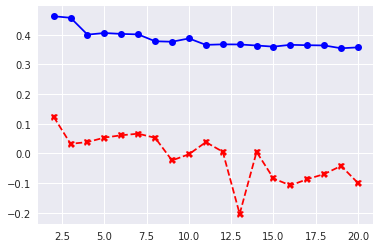

In [327]:
customer_km_sil = np.empty(19)
customer_gmm_sil = np.empty(19)
for i in range(2,21):
    km = KMeans(n_clusters=i)
    gmm = GaussianMixture(n_components=i, max_iter=1000)
    customer_km = km.fit(customer_norm_core1)
    customer_km_sil[i-2] = silhouette_score(customer_norm_core1, customer_km.labels_)
    customer_gmm = gmm.fit(customer_norm_core1)
    customer_gmm_sil[i-2] = silhouette_score(customer_norm_core1, customer_gmm.predict(customer_norm_core1))
plt.plot(range(2,21), customer_km_sil, 'b-', marker='o', linestyle='-')
plt.plot(range(2,21), customer_gmm_sil, 'r-', marker='X', linestyle='--')

In [365]:
gmm = GaussianMixture(n_components=7)
customer_gmm = gmm.fit(customer_norm_core1)

In [366]:
pd.Series(customer_gmm.predict(customer_norm_core1)).value_counts()

5    994
0    657
6    509
2    383
3    354
4    265
1    153
dtype: int64

In [367]:
customer_segment = pd.DataFrame(customer_gmm.means_, columns=customer_norm_core1.columns)
customer_segment

,NoOfInvoices,NoOfUniqueItems,TotalQuantity,UniqueItemsPerInvoice
0,-0.299988,-0.353388,-0.252473,-0.241483
1,-0.428896,-0.314629,-0.241710,0.718676
2,-0.171081,-0.199663,-0.174322,-0.233944
3,0.558397,0.427819,0.241923,-0.230100
4,-0.031254,0.584418,0.225676,0.676304
5,-0.428896,-0.542903,-0.334867,-0.308510
6,0.065048,-0.200045,-0.151283,-0.510586


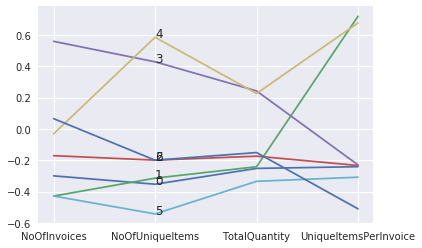

In [368]:
for i in range(gmm.n_components):
    plt.plot(customer_segment.iloc[i,:])
    plt.text(1, customer_segment.iloc[i,1], i)

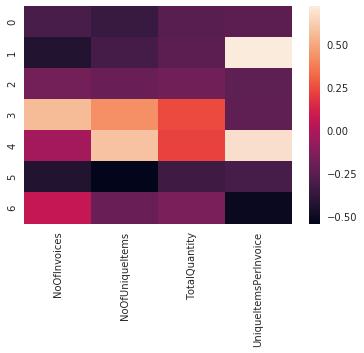

In [369]:
sns.heatmap(customer_segment)

## Clustering the outliers

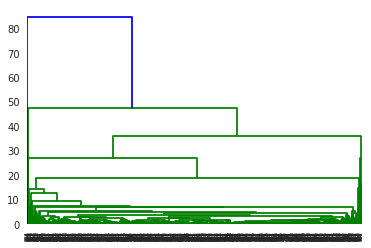

In [345]:
customer_link = linkage(customer_norm_outlier, "average")
dendrogram(customer_link)
plt.show()

In [347]:
km = KMeans(n_clusters=5, max_iter=1000)
customer_km = km.fit(customer_norm_outlier)
pd.Series(customer_km.labels_).value_counts()

0    516
1    423
3      8
4      4
2      1
dtype: int64

## PCA

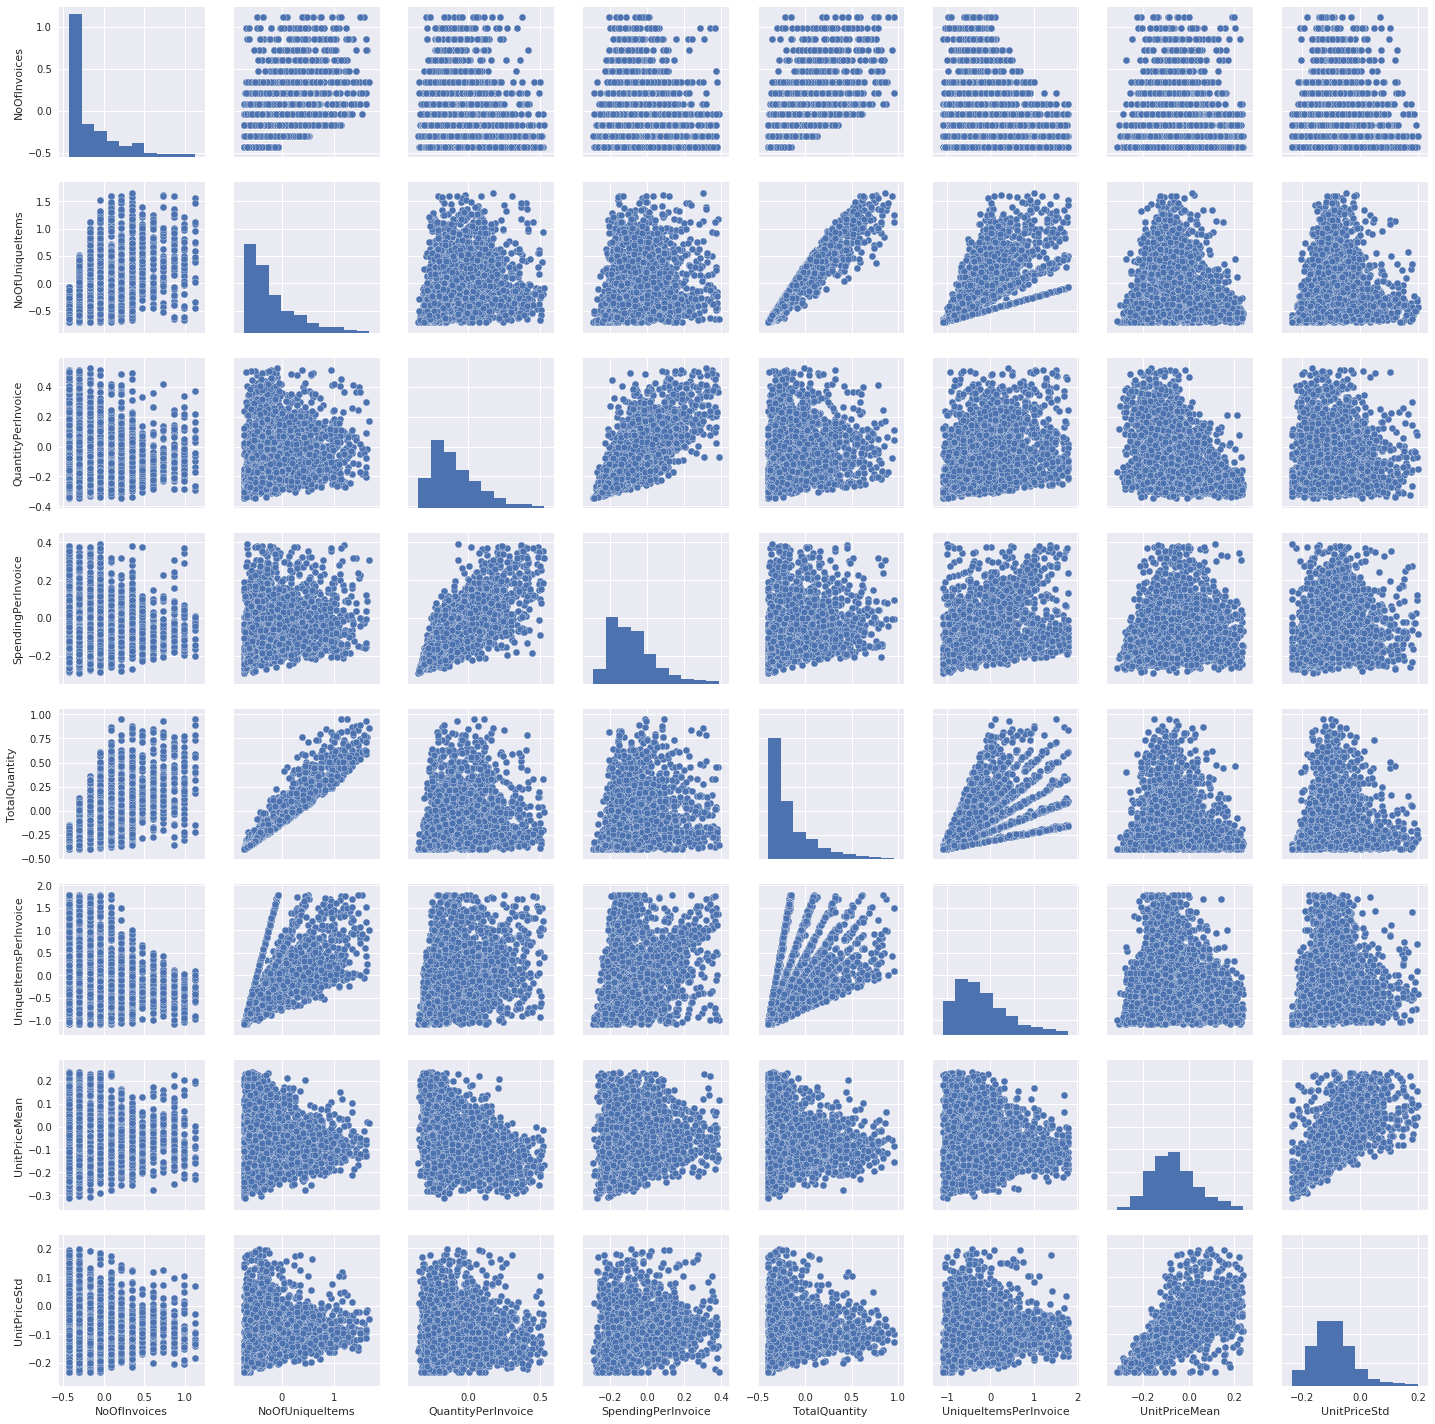

In [348]:
sns.pairplot(customer_norm_core)

Text(0,0.5,'cumulative explained variance')

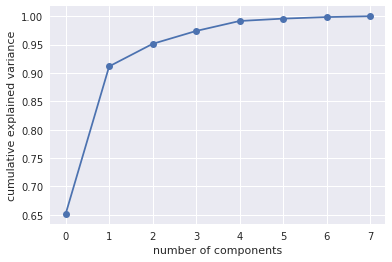

In [350]:
from sklearn.decomposition import PCA
pca = PCA().fit(customer_norm_core)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [351]:
pca = PCA(n_components=2)
customer_pca = pca.fit_transform(customer_norm_core)

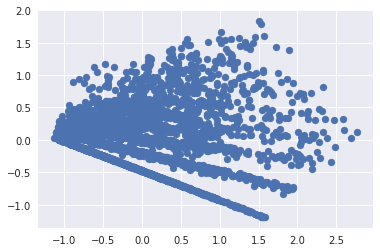

In [353]:
plt.scatter(customer_pca[:,0], customer_pca[:,1])

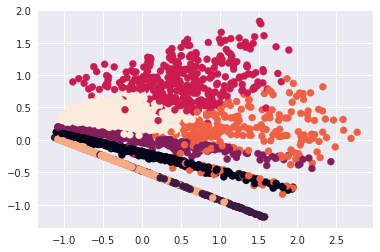

In [370]:
plt.scatter(customer_pca[:,0], customer_pca[:,1], c=customer_gmm.predict(customer_norm_core1))